# Entrega 2

Monte um algoritmo preditivo de projeção OU de classificação, utilizando respetivamente Regressão Linear ou Regressão Logística. Para tal, selecione uma base de dados adequada no https://www.kaggle.com/datasets. Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label. Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto) 

#  Análise exploratória de dados

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o conjunto de dados
url = "https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/data%20science%20with%20python/BostonHousing.csv"
df = pd.read_csv(url)


In [30]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [32]:
df.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

[Text(0.5, 0, 'crim'),
 Text(1.5, 0, 'zn'),
 Text(2.5, 0, 'indus'),
 Text(3.5, 0, 'chas'),
 Text(4.5, 0, 'nox'),
 Text(5.5, 0, 'rm'),
 Text(6.5, 0, 'age'),
 Text(7.5, 0, 'dis'),
 Text(8.5, 0, 'rad'),
 Text(9.5, 0, 'tax'),
 Text(10.5, 0, 'ptratio'),
 Text(11.5, 0, 'b'),
 Text(12.5, 0, 'lstat'),
 Text(13.5, 0, 'medv')]

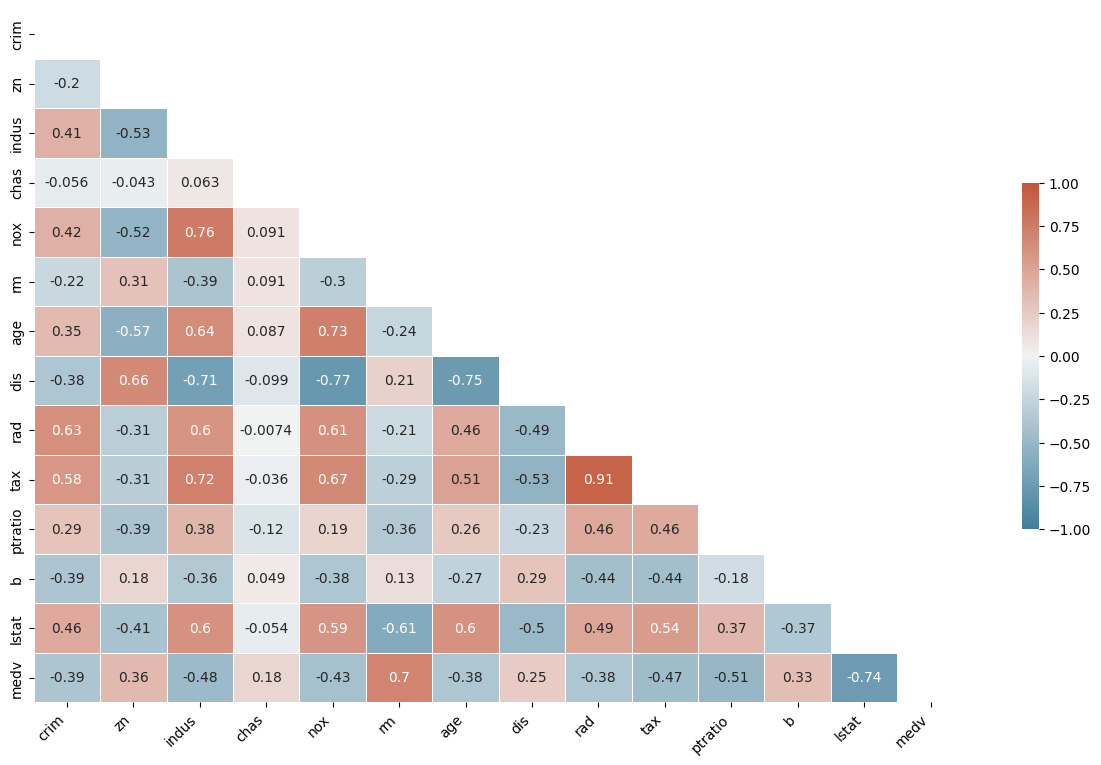

In [33]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (15, 9))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

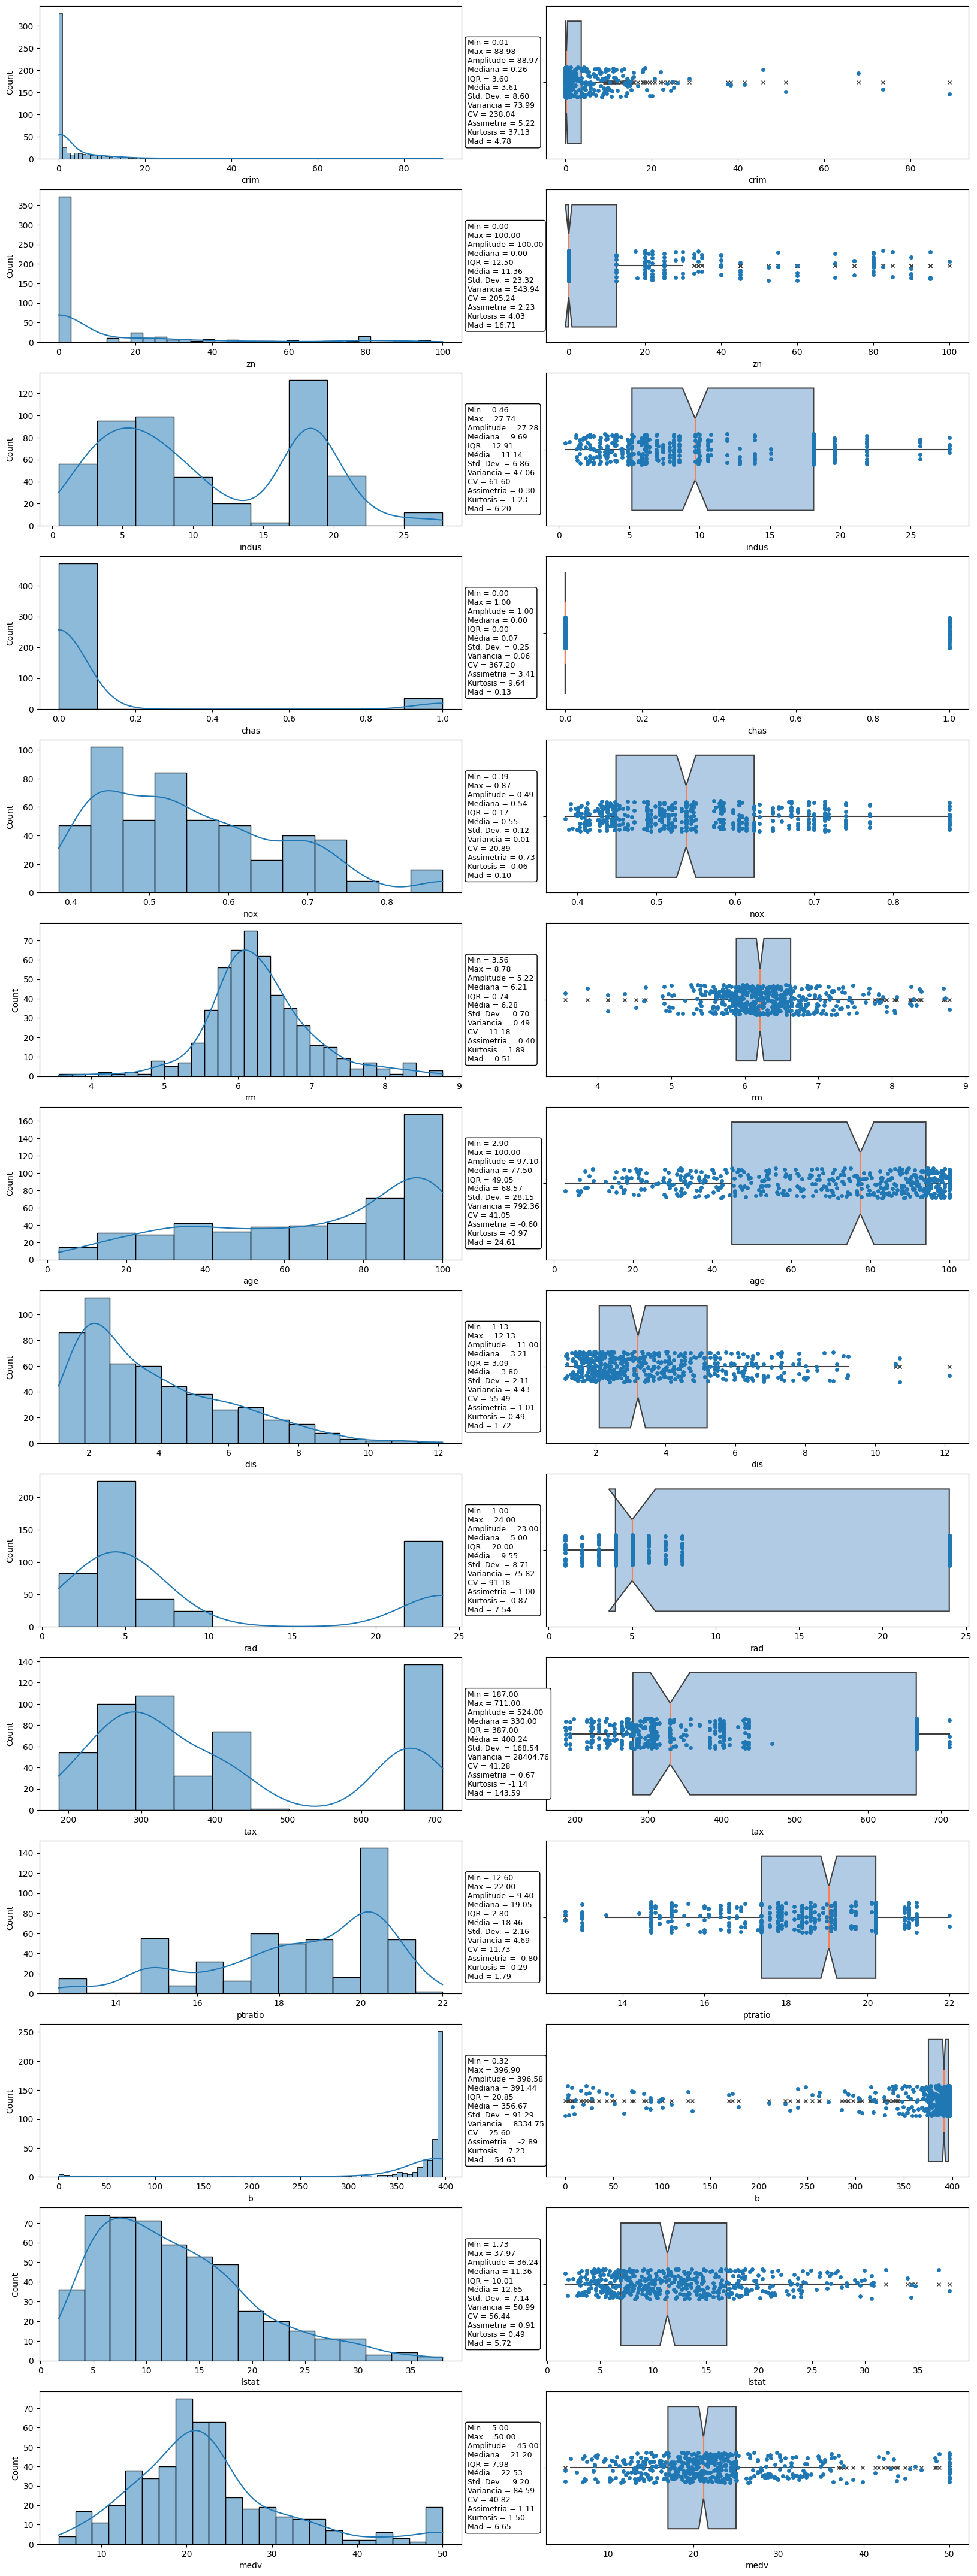

In [34]:
tamanho_figsize = len(df.columns)
fig, axes = plt.subplots(nrows=len(df.columns),ncols=2,  figsize=(20, 55))

for i in range(len(df.columns)):
    feature = df.columns[i]
    data=df.copy()
    
    kurt = data[feature].kurtosis()
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode()[0]
    std_dev = data[feature].std()
    iqr = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    min_val = data[feature].min()
    max_val = data[feature].max()
    amplitude = data[feature].max() - data[feature].min()
    variance = data[feature].var()
    cv = data[feature].std() / data[feature].mean() * 100
    skewness = data[feature].skew()
    mad = np.abs(data[feature] - data[feature].mean()).mean()
    
    

    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    

    hist_pos = axes[i][0].get_position()
    

    sns.boxplot(x=data[feature], ax=axes[i][1], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
    sns.stripplot(x=data[feature], ax=axes[i][1])
    

    bbox_props = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    textstr = f'Min = {min_val:.2f}\nMax = {max_val:.2f}\nAmplitude = {amplitude:.2f}\nMediana = {median:.2f}\nIQR = {iqr:.2f}\nMédia = {mean:.2f}\nStd. Dev. = {std_dev:.2f}\nVariancia = {variance:.2f}\nCV = {cv:.2f}\nAssimetria = {skewness:.2f}\nKurtosis = {kurt:.2f}\nMad = {mad:.2f}'

    t = axes[i][1].text(hist_pos.x0 + 0.357, hist_pos.y0 + 0.0045, textstr, transform=fig.transFigure, bbox=bbox_props, fontsize=9)
    

# Regressão Linear

In [35]:
X = df[['lstat', 'rm']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [36]:
y_pred = linear_model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R2²: ", r2)


Mean Squared Error:  31.243290601783627
R2²:  0.5739577415025858


# Conclusões

Com base no desempenho do nosso modelo de Regressão Linear, podemos concluir que 'lstat' (percentual de população de baixa renda) e 'rm' (número médio de quartos por habitação) são fatores importantes para determinar o preço das casas em Boston.

Os tomadores de decisão podem utilizar essas informações para direcionar suas políticas de investimento e desenvolvimento imobiliário. Por exemplo, eles podem considerar investir em áreas com menor percentual de população de baixa renda e maior número de quartos por habitação, pois essas áreas podem ter uma maior valorização imobiliária. No entanto, é importante lembrar que o modelo é simplificado e pode haver outros fatores que afetam os preços das casas na área.

O Mean Squared Error (MSE) é uma medida de erro médio quadrático entre os valores reais e previstos. Quanto menor o MSE, melhor o modelo. Neste caso, o MSE é 31.24, o que indica que há espaço para melhorias.

O R2 Score (coeficiente de determinação) é uma medida que indica o quão bem as variáveis independentes explicam a variável dependente. O R2 Score varia entre 0 e 1, sendo 1 o melhor valor possível. Um R2 Score de 0,574 indica que o modelo atual explica aproximadamente 57,4% da variabilidade dos preços das casas. Embora não seja um resultado ruim, há margem para melhorias.

Aqui estão algumas sugestões para melhorar o desempenho do modelo: Feature engineering, Tratamento de outliers, Padronização/normalização, Seleção de features, Modelos mais complexos, Validação cruzada, Ajuste de hiperparâmetros.

